### Importar base de dados

In [15]:
import pandas as pd
import numpy as np


vinhos = pd.read_csv("winequality.csv")

vinhos = vinhos.drop("Unnamed: 0", axis=1)

display(vinhos)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


### Analisar colunas

In [5]:
'''
Não há valores vazios e datatypes já estão corretos
'''

print(vinhos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


### Normalização dos dados

In [16]:
vinhos_norm = vinhos.drop("quality", axis=1)

quality = vinhos[["quality"]]             

vinhos_norm = vinhos_norm.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

vinhos_norm = pd.concat([vinhos_norm, quality], axis=1)

display(vinhos_norm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_is_red,quality
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,1.0,6
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,1.0,6
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,0.0,6
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,0.0,6
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.322314,0.160000,0.373494,0.153374,0.044850,0.190972,0.338710,0.206092,0.317829,0.123596,0.130435,0.0,6
6493,0.198347,0.093333,0.168675,0.024540,0.051495,0.079861,0.274194,0.088490,0.364341,0.146067,0.362319,0.0,6
6494,0.338843,0.166667,0.168675,0.475460,0.073090,0.118056,0.391705,0.447079,0.333333,0.089888,0.115942,0.0,6
6495,0.264463,0.146667,0.168675,0.024540,0.054817,0.069444,0.394009,0.087719,0.372093,0.196629,0.492754,0.0,5


### Análise PCA

                  Coluna      Peso
0          fixed acidity  0.692196
1       volatile acidity  0.118142
2            citric acid  0.062741
3         residual sugar  0.031299
4              chlorides  0.026514
5    free sulfur dioxide  0.016982
6   total sulfur dioxide  0.016079
7                density  0.012878
8                     pH  0.011863
9              sulphates  0.006193
10               alcohol  0.004734
11           wine_is_red  0.000378


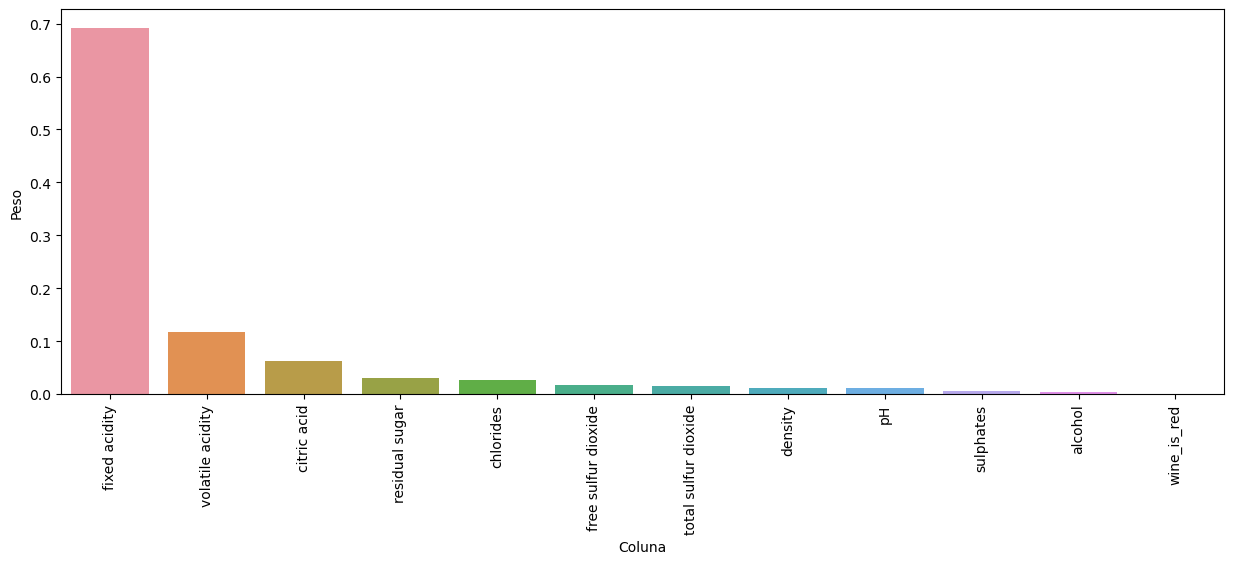

In [7]:
'''
Optarei por manter as colunas até o ph, considerando que após isso, a variação é inferior a 1%.
'''

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca_df = vinhos_norm.drop("quality", axis=1)

pca = PCA()
pca.fit(pca_df)

impacto_pca = pca.explained_variance_ratio_

colunas = list(pca_df.columns)
dic = dict()
for i in range(len(impacto_pca)):
    dic[colunas[i]] = impacto_pca[i]

df = pd.DataFrame({"Coluna": colunas, "Peso": impacto_pca})

print(df.sort_values(by="Peso", ascending=False))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df["Coluna"], y=df["Peso"])
ax.tick_params(axis='x', rotation=90)

### Observar variação da coluna 'fixed acidity' em relação às notas de qualidade

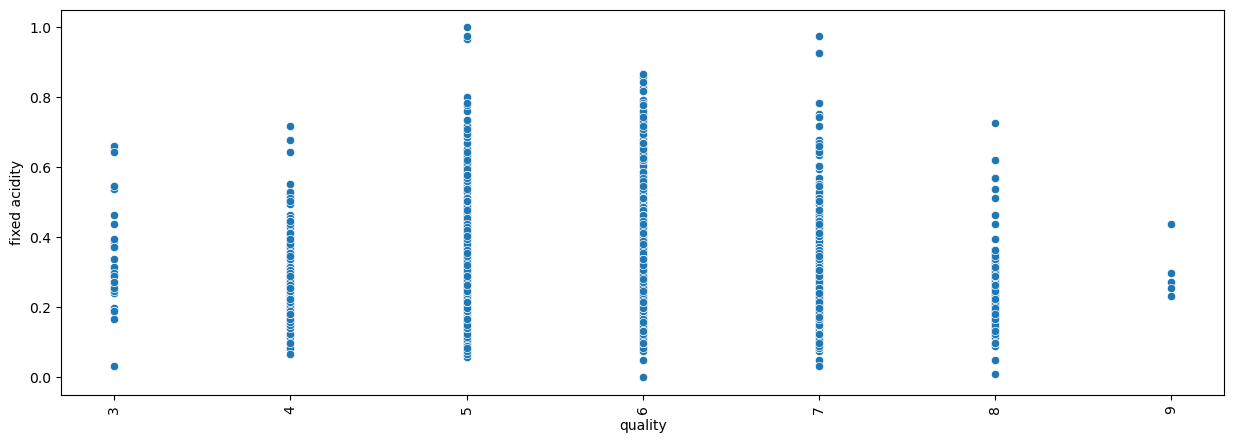

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x=vinhos_norm["quality"], y=vinhos_norm["fixed acidity"])
ax.tick_params(axis='x', rotation=90)

### Redução do modelo

In [17]:
# retirada das colunas com base na análise PCA feita acima
vinhos_norm1 = vinhos_norm.copy()
vinhos_norm1 = vinhos_norm.drop(["sulphates", "alcohol"], axis=1)
vinhos_norm = vinhos_norm.drop(["sulphates", "alcohol", "wine_is_red"], axis=1)

### Implementação da ideia por trás do KNN

In [54]:
# métrica euclidiana de medição da distância
def KNN(dataset, y_name, previsao):
    
    
    # definir número de vizinhos
    K = round(np.sqrt(len(dataset.index)))
    
    # Tratar K caso seja par
    if K % 2 == 0:
        K = K + 1
        
    colunas = list(previsao.columns)
    
    previsao["Prediction"] = 0
    
    # para cada linha que vamos prever
    for linha in previsao.index:
        
        # criar df com distancias euclidianas entre cada ponto
        y_df = dataset[[y_name]].copy()
        y_df["Euclidean Distance"] = 0
        
        total = 0
        
        # calcular distâncias euclidianas entre cada ponto
        for l in y_df.index:
            for coluna in colunas:
                total = total + np.square(float(dataset.loc[l, coluna]) - float(previsao.loc[linha, coluna]))
            
            # adicionar resultado na coluna "Euclidean Distance"
            y_df.loc[l, "Euclidean Distance"] = np.sqrt(total)
        
        # filtrar df para K vizinhos mais próximos
        y_df = y_df.sort_values("Euclidean Distance")[:K]
        
        # ver qual classificação apresenta maior número de repetições
        resultado = y_df[[y_name]].groupby(y_name).value_counts().sort_values(ascending=False)
        
        # definir previsao com base no princípio de majority vote
        previsao.loc[linha, "Prediction"] = resultado.head(1).index[0]
    
    
    return previsao

# testar com menos vizinhos
def KNN2(dataset, y_name, previsao):
    
    
    # definir número de vizinhos
    K = 5
        
    colunas = list(previsao.columns)
    
    previsao["Prediction"] = 0
    
    # para cada linha que vamos prever
    for linha in previsao.index:
        
        # criar df com distancias euclidianas entre cada ponto
        y_df = dataset[[y_name]].copy()
        y_df["Euclidean Distance"] = 0
        
        total = 0
        
        # calcular distâncias
        for l in y_df.index:
            for coluna in colunas:
                total = total + np.square(float(dataset.loc[l, coluna]) - float(previsao.loc[linha, coluna]))
            
            # adicionar resultado na coluna "Euclidean Distance"
            y_df.loc[l, "Euclidean Distance"] = np.sqrt(total)
        
        # filtrar df para K vizinhos mais próximos
        y_df = y_df.sort_values("Euclidean Distance")[:K]
        
        # ver qual classificação apresenta maior número de repetições
        resultado = y_df[[y_name]].groupby(y_name).value_counts().sort_values(ascending=False)
        
        # definir previsão com base no princípio de majority vote
        previsao.loc[linha, "Prediction"] = resultado.head(1).index[0]
    
    
    return previsao
        

### Dividir em treino e teste

In [10]:
'''
Dividir df aproximadamente em 75% para treino e 25% para teste
'''

vinhos_norm["is_train"] = np.random.uniform(0, 1, len(vinhos_norm)) <= .75

train, test = vinhos_norm[vinhos_norm["is_train"] == True], vinhos_norm[vinhos_norm["is_train"] == False]

print(f'Teste: {len(test)}\nTreino {len(train)}')

# retirar coluna "is_train"
train = train.drop("is_train", axis=1)
test = test.drop("is_train", axis=1)

# reiniciar índices
train = train.reset_index()
test = test.reset_index()

Teste: 1619
Treino 4878


### Testar lógica criada

In [13]:
model = KNN(train, "quality", test.drop("quality", axis=1))

display(model)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,Prediction
0,2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,6
1,4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,6
2,15,0.363636,0.133333,0.361446,0.036810,0.157807,0.031250,0.036866,0.215346,0.519380,6
3,20,0.181818,0.106667,0.192771,0.087423,0.034884,0.114583,0.283410,0.144399,0.620155,6
4,22,0.198347,0.246667,0.156627,0.058282,0.089701,0.215278,0.460829,0.132832,0.426357,6
...,...,...,...,...,...,...,...,...,...,...,...
1614,6477,0.239669,0.060000,0.222892,0.021472,0.049834,0.114583,0.274194,0.098130,0.418605,6
1615,6480,0.247934,0.400000,0.126506,0.023006,0.101329,0.027778,0.039171,0.160979,0.511628,6
1616,6487,0.280992,0.366667,0.000000,0.019939,0.146179,0.045139,0.073733,0.185849,0.503876,6
1617,6488,0.305785,0.106667,0.174699,0.007669,0.061462,0.114583,0.179724,0.059572,0.248062,6


### Avaliar modelo criado

In [27]:
'''
Considernando que a maioria das amostras apresentam qualidade 6, os dados encontram-se desbalanceados. Assim, percebe-se que o
modelo não performou tão bem, apresentando boas possibilidades de melhoria a partir do uso de técnicas de balanceamento, as quais
foram usadas mais abaixo
'''

# matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test["quality"], model["Prediction"])

print(cm)

print()

a_model = model[["Prediction"]]

a_test = test[["quality"]]

certos = 0
for i in a_model.index:
    m = a_model.loc[i, "Prediction"]
    t = a_test.loc[i, "quality"]
    if m == t:
        certos = certos + 1
        
acuracia = certos / len(a_model)

print(f"Acurácia: {acuracia}")

[[  0   0   0   9   0   0   0]
 [  0   0   0  59   0   0   0]
 [  0   0   0 522   0   0   0]
 [  0   0   0 716   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  48   0   0   0]
 [  0   0   0   1   0   0   0]]

Acurácia: 0.44224830142063004


### Teste com menos vizinhos

In [59]:
model1 = KNN2(train, "quality", test.drop("quality", axis=1))

display(model1)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,Prediction
0,2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,6
1,4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,6
2,15,0.363636,0.133333,0.361446,0.036810,0.157807,0.031250,0.036866,0.215346,0.519380,6
3,20,0.181818,0.106667,0.192771,0.087423,0.034884,0.114583,0.283410,0.144399,0.620155,6
4,22,0.198347,0.246667,0.156627,0.058282,0.089701,0.215278,0.460829,0.132832,0.426357,6
...,...,...,...,...,...,...,...,...,...,...,...
1614,6477,0.239669,0.060000,0.222892,0.021472,0.049834,0.114583,0.274194,0.098130,0.418605,6
1615,6480,0.247934,0.400000,0.126506,0.023006,0.101329,0.027778,0.039171,0.160979,0.511628,6
1616,6487,0.280992,0.366667,0.000000,0.019939,0.146179,0.045139,0.073733,0.185849,0.503876,6
1617,6488,0.305785,0.106667,0.174699,0.007669,0.061462,0.114583,0.179724,0.059572,0.248062,6


In [60]:
# matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test["quality"], model1["Prediction"])

print(cm)

print()

a_model1 = model1[["Prediction"]]

a_test1 = test[["quality"]]

certos = 0
for i in a_model1.index:
    m = a_model1.loc[i, "Prediction"]
    t = a_test1.loc[i, "quality"]
    if m == t:
        certos = certos + 1
        
acuracia = certos / len(a_model1)

print(f"Acurácia: {acuracia}")

[[  0   0   0   9   0   0   0]
 [  0   0   0  59   0   0   0]
 [  0   0   0 522   0   0   0]
 [  0   0   0 716   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  48   0   0   0]
 [  0   0   0   1   0   0   0]]

Acurácia: 0.44224830142063004


### Modelo do sklearn

In [10]:
'''
A redução da quantidade de vizinhos melhorou a acurácia do modelo. Com 81, foi alcançada a acurácia de 49%, mas com apenas 5, 
foi para 52%.

A adição das 3 colunas excluídas após a análise PCA aumentam apenas em 3% a acurácia do modelo
'''

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X = vinhos_norm.drop("quality", axis=1)
y = vinhos_norm[["quality"]]


# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

# criar instancia do algoritmo
classifier = KNeighborsClassifier(n_neighbors=81, p=2, metric='euclidean')

# treinar
classifier.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=81)

In [16]:
# prever
y_pred = classifier.predict(X_test)

In [17]:
# analisar desempenho do KNN do sklearn
cm = confusion_matrix(y_test, y_pred)

print(cm)

y_test1 = y_test.reset_index()

certos = 0
for i in range(len(y_test1)):
    pred = y_pred[i]
    real = y_test1.loc[i, "quality"]
    if pred == real:
        certos = certos + 1
        
acuracia = certos / len(y_pred)

print(f"Acurácia: {acuracia}")

[[  0   0   2   2   0   0]
 [  0   0  16  26   1   0]
 [  0   0 278 173   8   0]
 [  0   0 133 384  36   0]
 [  0   0   4 153  54   0]
 [  0   0   1  15  14   0]]
Acurácia: 0.5507692307692308


### Classificação Binária do vinho tinto

In [18]:
'''
Todos modelos testados performaram muito bem. Ainda assim, Extra Trees e Regressão Logística 
foram os modelos com as maiores marcas de desempenho

OBS: os dados encontram-se desbalanceados. A ideia de balanceamento foi aplicada apenas à categorização multiclasse abaixo,
por questões de tempo e demonstração do conteúdo do período
'''

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_et = ExtraTreesClassifier()
modelo_dt = DecisionTreeClassifier()

modelos = {'RandomForest': modelo_rf,
          'LogisticRegression': modelo_lr,
          'ExtraTrees': modelo_et,
           'DecisionTree': modelo_dt,
          }


y = vinhos_norm1['wine_is_red']
X = vinhos_norm1.drop('wine_is_red', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(nome_modelo)
    print(confusion_matrix(y_test, previsao))
    print(f"f1_score: {f1_score(y_test, previsao)}")
    print(f"accuracy: {accuracy_score(y_test, previsao)}")
    print()

RandomForest
[[1213    5]
 [   6  401]]
f1_score: 0.986469864698647
accuracy: 0.9932307692307693

LogisticRegression
[[1214    4]
 [  12  395]]
f1_score: 0.9801488833746897
accuracy: 0.9901538461538462

ExtraTrees
[[1214    4]
 [   5  402]]
f1_score: 0.9889298892988929
accuracy: 0.9944615384615385

DecisionTree
[[1206   12]
 [   9  398]]
f1_score: 0.9742962056303549
accuracy: 0.9870769230769231



### Feature Importance do RandomForest Binário

,0
total sulfur dioxide,0.338840
chlorides,0.294819
volatile acidity,0.133306
density,0.057874
fixed acidity,0.051037
residual sugar,0.042454
free sulfur dioxide,0.038990
pH,0.023966
citric acid,0.015030
quality,0.003684


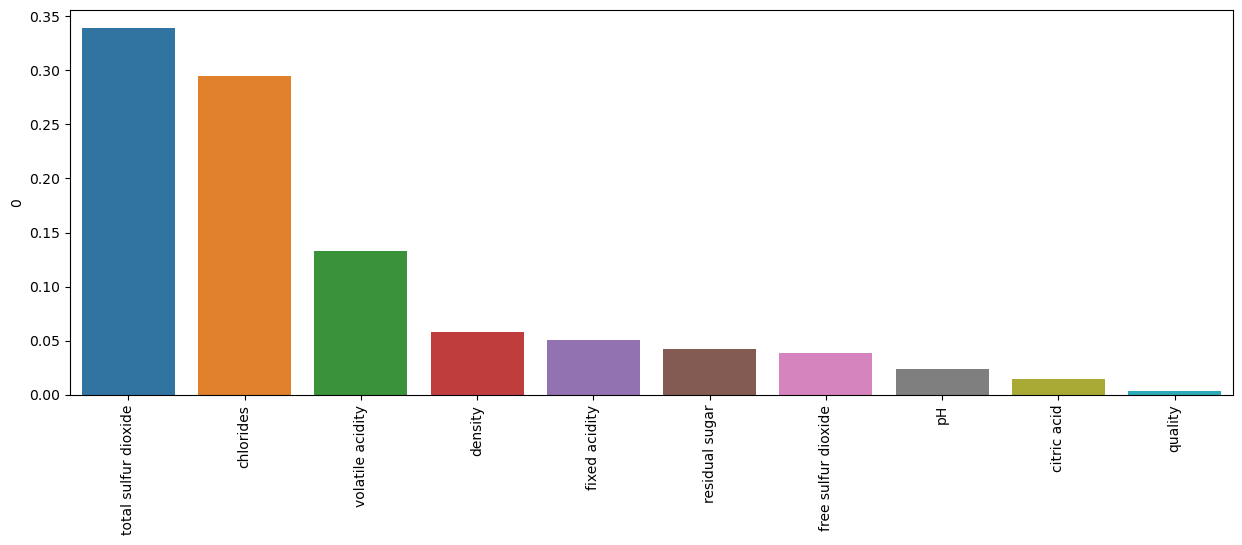

In [21]:
'''
Como se pode perceber, a feature de densidade foi a mais importante no modelo Random Forest
'''

import matplotlib.pyplot as plt
import seaborn as sns


columns = list(vinhos_norm1.columns)

# retirar coluna "is_red"
columns.pop(-2)

importancia_features = pd.DataFrame(modelo_rf.feature_importances_, columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Classificação Multiclasse para Qualidade do Vinho

In [12]:
'''
Extra trees performou melhor
'''

modelo_rf = RandomForestClassifier()
modelo_et = ExtraTreesClassifier()
modelo_dt = DecisionTreeClassifier()

modelos = {'RandomForest': modelo_rf,
          'ExtraTrees': modelo_et,
           'DecisionTree': modelo_dt,
          }


y = vinhos_norm['quality']
X = vinhos_norm.drop('quality', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(nome_modelo)
    print(confusion_matrix(y_test, previsao))
    #print(f"f1_score: {f1_score(y_test, previsao)}")
    print(f"accuracy: {accuracy_score(y_test, previsao)}")
    print()

RandomForest
[[  0   1   2   2   0   0]
 [  0   5  27  19   1   0]
 [  0   3 401 170   5   0]
 [  0   0  86 540  45   0]
 [  0   0   8 119 142   4]
 [  0   0   0  15  15  15]]
accuracy: 0.6787692307692308

ExtraTrees
[[  0   1   2   2   0   0]
 [  0   8  23  20   1   0]
 [  1   5 407 161   5   0]
 [  0   0  87 546  38   0]
 [  0   0   8 122 137   6]
 [  0   0   0  15  12  18]]
accuracy: 0.6867692307692308

DecisionTree
[[  0   1   1   2   1   0   0]
 [  1   8  18  17   6   2   0]
 [  1  23 336 191  25   3   0]
 [  0   7 149 396 104  14   1]
 [  0   1  35  93 123  21   0]
 [  0   1   0  14  15  15   0]
 [  0   0   0   0   0   0   0]]
accuracy: 0.5403076923076923



### Feature Importance no RandomForest Multiclasse

,0
density,0.144023
total sulfur dioxide,0.120164
volatile acidity,0.116299
residual sugar,0.111416
chlorides,0.107976
free sulfur dioxide,0.106711
pH,0.103659
citric acid,0.097151
fixed acidity,0.092603


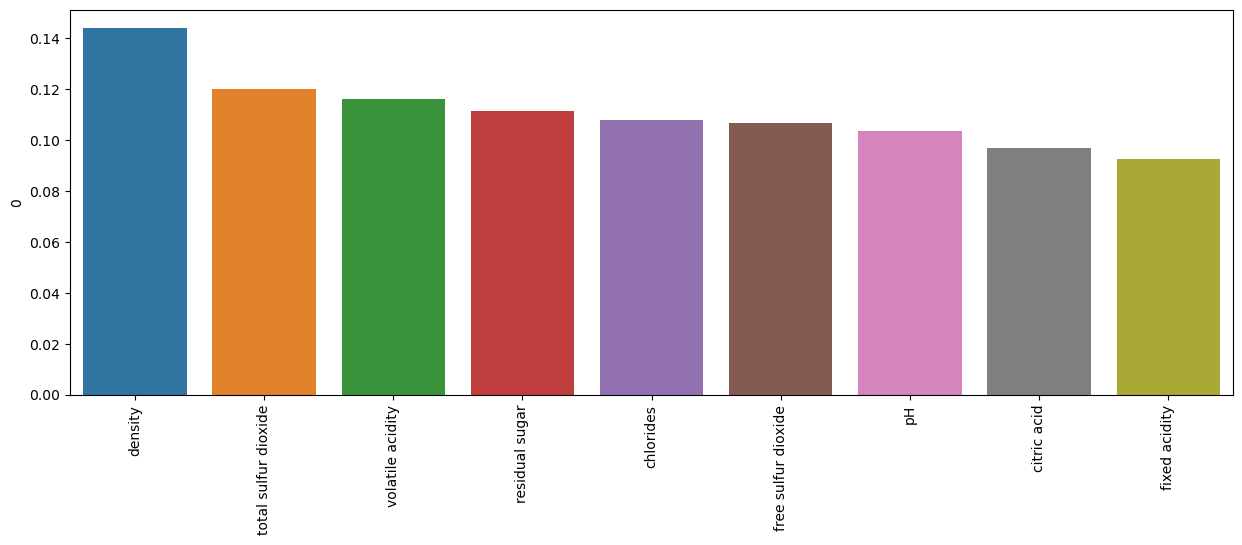

In [23]:
'''
Como se pode perceber, a feature de densidade foi a mais importante no modelo Random Forest
'''

import matplotlib.pyplot as plt
import seaborn as sns


columns = list(vinhos_norm.columns)
columns.pop(-1)

importancia_features = pd.DataFrame(modelo_rf.feature_importances_, columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Desempenho dos algoritmos sem normalização

In [18]:
'''
A acurácia dos modelos mudou pouco quando utilizados dados não normalizados
'''

modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_et = ExtraTreesClassifier()
modelo_dt = DecisionTreeClassifier()

modelos = {'RandomForest': modelo_rf,
          'ExtraTrees': modelo_et,
           'DecisionTree': modelo_dt,
          }

vinhos1 = vinhos.copy()
vinhos1 = vinhos1.drop(["sulphates", "alcohol", "wine_is_red"], axis=1)

y = vinhos_norm['quality']
X = vinhos_norm.drop('quality', axis=1)

# dividir em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(nome_modelo)
    print(confusion_matrix(y_test, previsao))
    #print(f"f1_score: {f1_score(y_test, previsao)}")
    print(f"accuracy: {accuracy_score(y_test, previsao)}")
    print()

RandomForest
[[  0   1   1   3   0   0]
 [  0   4  30  17   1   0]
 [  0   3 399 175   2   0]
 [  0   0 110 518  43   0]
 [  0   0   5 123 142   3]
 [  0   0   1  15  17  12]]
accuracy: 0.6615384615384615

ExtraTrees
[[  0   1   2   2   0   0]
 [  0   6  22  23   1   0]
 [  0   4 400 173   2   0]
 [  0   1  84 547  38   1]
 [  0   0  11 128 131   3]
 [  0   0   1  14  15  15]]
accuracy: 0.6763076923076923

DecisionTree
[[  0   2   1   2   0   0   0]
 [  0  13  18  12   6   2   1]
 [  1  22 315 189  44   8   0]
 [  0  18 131 401 101  19   1]
 [  0   3  42  86 122  20   0]
 [  0   0   0  18  13  14   0]
 [  0   0   0   0   0   0   0]]
accuracy: 0.5323076923076923



### Tentativa de Undersampling para melhorar KNN

In [94]:
# observar numero de amostras para cada nota de qualidade
'''
Torna-se visível o quão desbalanceada está a representatividade das amostras
'''

ver = vinhos_norm[["quality"]].groupby("quality").value_counts().sort_values()

display(ver)

quality
9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
dtype: int64

In [95]:
# pegar nota de qualidade com a menor qtd de amostras

vinhos_under = vinhos_norm.copy()
vinhos_under["is_train"] = True

# valor da menor amostra
amostra_min = int(ver.head(1).values[0])

notas = [3, 8, 4, 7, 5, 6]

sample = pd.DataFrame(columns=vinhos_under.columns)

# aplicar técnica de undersampling (grande perda de dados)
for nota in notas:
    df_parcial = vinhos_under.loc[vinhos_under["quality"] == nota, :]
    
    
    # definir amostras de teste
    i = df_parcial.sample(1, random_state=1).index
    
    df_parcial.loc[i, "is_train"] = False
    
    # igualar qtd de amostras pela técnica de undersampling
    under = df_parcial.sample(amostra_min, random_state=1)
    
    sample = pd.concat([sample, under], axis=0)
    
    
sample = sample.reset_index()
sample = sample.drop("index", axis=1)
display(sample)

C:\Users\User\AppData\Local\Temp\ipykernel_16840\4198463294.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, under], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\4198463294.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, under], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\4198463294.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, under], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\4198463294.py:22: FutureWarning: In a future version, object-dtype columns with all-bool valu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,quality,is_train
0,0.297521,0.736667,0.000000,0.055982,0.146179,0.013889,0.018433,0.182957,0.705426,3,False
1,0.247934,0.490000,0.000000,0.009202,0.428571,0.052083,0.052995,0.146520,0.465116,3,True
2,0.314050,1.000000,0.000000,0.023006,0.212625,0.013889,0.006912,0.147484,0.604651,3,True
3,0.289256,0.600000,0.030120,0.023006,0.086379,0.065972,0.099078,0.191633,0.457364,3,True
4,0.537190,0.060000,0.283133,0.012270,0.046512,0.013889,0.062212,0.130904,0.131783,3,True
5,0.355372,0.060000,0.265060,0.207055,0.073090,0.145833,0.320276,0.260073,0.434109,8,False
6,0.165289,0.156667,0.162651,0.014571,0.028239,0.048611,0.147465,0.054559,0.503876,8,True
7,0.289256,0.146667,0.204819,0.032209,0.058140,0.114583,0.235023,0.075959,0.496124,8,True
8,0.355372,0.060000,0.265060,0.207055,0.073090,0.145833,0.320276,0.260073,0.434109,8,True
9,0.132231,0.300000,0.096386,0.032209,0.044850,0.114583,0.281106,0.027955,0.372093,8,True


In [68]:
'''
Dividir df em 80% para treino e 20% para teste
'''

train, test = sample[sample["is_train"] == True], sample[sample["is_train"] == False]

print(f'Teste: {len(test)}\nTreino {len(train)}')

# retirar coluna "is_train"
train = train.drop("is_train", axis=1)
test = test.drop("is_train", axis=1)

# reiniciar índices
train = train.reset_index()
test = test.reset_index()


Teste: 6
Treino 24


In [69]:
# testar novamente KNN criado

model3 = KNN(train, "quality", test.drop("quality", axis=1))

display(model3)
display(test["quality"])

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,Prediction
0,0,0.297521,0.736667,0.000000,0.055982,0.146179,0.013889,0.018433,0.182957,0.705426,3
1,5,0.355372,0.060000,0.265060,0.207055,0.073090,0.145833,0.320276,0.260073,0.434109,3
2,10,0.289256,0.200000,0.138554,0.090491,0.068106,0.059028,0.221198,0.114324,0.294574,3
3,15,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,3
4,20,0.272727,0.193333,0.403614,0.151840,0.059801,0.166667,0.343318,0.200308,0.341085,3
5,25,0.289256,0.120000,0.198795,0.171779,0.079734,0.163194,0.278802,0.189319,0.294574,3


0    3
1    8
2    4
3    7
4    5
5    6
Name: quality, dtype: object

In [70]:
# avaliação dos resultados

'''
O modelo apresentou uma redução na acurácia, o que pode ser explicado pelo volume tão pequeno de dados utilizados. 
Undersampling parece não ser a melhor escolha nesse cenário.
'''

a_model = model3[["Prediction"]]

a_test = test[["quality"]]

certos = 0
for i in a_model.index:
    m = a_model.loc[i, "Prediction"]
    t = a_test.loc[i, "quality"]
    if m == t:
        certos = certos + 1
        
acuracia = certos / len(a_model)

print(f"Acurácia: {acuracia}")

Acurácia: 0.16666666666666666


### Undersampling no KNN do sklearn

In [105]:
# Modelo do sklearn com undersampling
'''
Resultado obtido bem parecido com a lógica própria desenvolvida para o KNN
'''

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sample1 = sample.copy()
sample1 = sample1.drop("is_train", axis=1)

X = sample1.drop("quality", axis=1)
y = sample1["quality"]
y = y.astype(int)

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# criar instancia do algoritmo
classifier1 = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

# treinar
classifier1.fit(X_train, y_train)

# prever
y_pred = classifier1.predict(X_test)

# avaliar modelo
cm = confusion_matrix(y_test, y_pred)

print(cm)

y_test1 = y_test.reset_index()

certos = 0
for i in range(len(y_test1)):
    pred = y_pred[i]
    real = y_test1.loc[i, "quality"]
    if pred == real:
        certos = certos + 1
        
acuracia = certos / len(y_pred)

print(f"Acurácia: {acuracia}")

[[0 1 1 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 1 1]]
Acurácia: 0.16666666666666666


### Tentativa de Oversampling para melhorar KNN

In [109]:
# observar numero de amostras para cada nota de qualidade

ver = vinhos_norm[["quality"]].groupby("quality").value_counts().sort_values(ascending=False)

display(ver)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
dtype: int64

In [110]:
# pegar nota de qualidade com a maior qtd de amostras

vinhos_over = vinhos_norm.copy()
vinhos_over["is_test"] = True

# valor da amostra relativa à nota com maior representatividade no df
amostra_max = int(ver.head(1).values[0])
tam_teste = round(0.2 * amostra_max)

notas = [5, 7, 4, 8, 3, 9]

sample = pd.DataFrame(columns=vinhos_over.columns)

# aplicar técnica de oversampling
for nota in notas:
    df_parcial = vinhos_over.loc[vinhos_over["quality"] == nota, :]
    
    # copiar amostras existentes, visando a balanceamento da representatividade
    df_parcial = df_parcial.sample(amostra_max, replace=True, random_state=1)
    
    # definir variaveis de treino/teste
    ind_testes = [i for i in df_parcial.sample(tam_teste, random_state=1).index]
    
    for ind in ind_testes:
        df_parcial.loc[ind, "is_test"] = False
    
    sample = pd.concat([sample, df_parcial], axis=0)
    
    
sample = sample.reset_index()
sample = sample.drop("index", axis=1)
display(sample)

C:\Users\User\AppData\Local\Temp\ipykernel_16840\293765343.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, df_parcial], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\293765343.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, df_parcial], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\293765343.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sample = pd.concat([sample, df_parcial], axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_16840\293765343.py:24: FutureWarning: In a future version, object-dtype columns with al

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,quality,is_test
0,0.181818,0.276667,0.162651,0.067485,0.245847,0.055556,0.283410,0.132061,0.240310,5,True
1,0.264463,0.173333,0.234940,0.096626,0.094684,0.145833,0.359447,0.163871,0.302326,5,True
2,0.165289,0.400000,0.012048,0.018405,0.129568,0.069444,0.202765,0.140544,0.635659,5,True
3,0.330579,0.360000,0.030120,0.026074,0.116279,0.017361,0.027650,0.197417,0.441860,5,True
4,0.214876,0.120000,0.210843,0.108896,0.078073,0.152778,0.426267,0.157316,0.341085,5,False
...,...,...,...,...,...,...,...,...,...,...,...
17011,0.297521,0.106667,0.216867,0.021472,0.036545,0.090278,0.306452,0.066320,0.434109,9,False
17012,0.297521,0.106667,0.216867,0.021472,0.036545,0.090278,0.306452,0.066320,0.434109,9,False
17013,0.256198,0.186667,0.204819,0.055215,0.014950,0.194444,0.260369,0.051860,0.434109,9,False
17014,0.438017,0.126667,0.271084,0.153374,0.043189,0.093750,0.271889,0.190669,0.372093,9,False


In [91]:
'''
Dividir df aproximadamente em 80% para treino e 20% para teste
'''

test, train = sample[sample["is_test"] == True], sample[sample["is_test"] == False]

print(f'Teste: {len(test)}\nTreino {len(train)}')

# retirar coluna "is_train"
train = train.drop("is_test", axis=1)
test = test.drop("is_test", axis=1)

# reiniciar índices
train = train.reset_index()
test = test.reset_index()

Teste: 3427
Treino 13589


In [92]:
'''
Com o aumento de dados pela técnica de oversampling, o modelo criado demora bastante tempo para ser rodado. Por isso, a comparação
de desempenho por meio destas técnicas foi realizada a partir do algoritmo de KNN disponibilizado na biblioteca sklearn.
Os resultados são apresentados mais abaixo
'''

# testar novamente KNN criado (mudar para knn do sklearn)

model4 = KNN(train, "quality", test.drop("quality", axis=1))

display(model4)
display(test["quality"])

KeyboardInterrupt: 

### Oversampling no KNN do sklearn

In [111]:
# Modelo do sklearn com oversampling

'''
Percebe-se um aumento considerável na acurácia do modelo. Entretanto, vale lembrar que os dados foram duplicados, ou seja, 
o risco de overfitting aumentou
'''

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


sample1 = sample.copy()
sample1 = sample1.drop("is_test", axis=1)

X = sample1.drop("quality", axis=1)
y = sample1["quality"]
y = y.astype(int)

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# criar instancia do algoritmo
classifier2 = KNeighborsClassifier(n_neighbors=131, p=2, metric='euclidean')

# treinar
classifier2.fit(X_train, y_train)

# prever
y_pred = classifier2.predict(X_test)

# avaliar modelo
cm = confusion_matrix(y_test, y_pred)

print(cm)

y_test1 = y_test.reset_index()

certos = 0
for i in range(len(y_test1)):
    pred = y_pred[i]
    real = y_test1.loc[i, "quality"]
    if pred == real:
        certos = certos + 1
        
acuracia = certos / len(y_pred)

print(f"Acurácia: {acuracia}")

[[600   0   0   0   0   0]
 [ 92 260  84  25  51   1]
 [ 83 105 227  73  59   9]
 [ 67  41  25 252 183  17]
 [ 52  23  24 109 330  32]
 [  0   0   0   0   0 580]]
Acurácia: 0.6606933019976499


### Método SMOTE

In [116]:
from imblearn.over_sampling import SMOTE

sm = vinhos_norm.copy()

# dividir df em X e y
X = sm.drop("quality", axis=1)
y = sm["quality"]

# aplicar método
smote = SMOTE(sampling_strategy="minority", k_neighbors=4)
X_sm, y_sm = smote.fit_resample(X, y)

In [117]:
# dividir variaveis teste e treino
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1, stratify=y_sm)

# criar instancia do algoritmo
classifier3 = KNeighborsClassifier(n_neighbors=81, p=2, metric='euclidean')

# treinar
classifier3.fit(X_train, y_train)

# prever
y_pred = classifier3.predict(X_test)

In [118]:
# avaliar o modelo

'''
Esse método também aumentou consideravelmente o desempenho do modelo, a partir da criação de amostras sintéticas a partir
da lógica por trás do KNN
'''

cm = confusion_matrix(y_test, y_pred)

print(cm)

y_test1 = y_test.reset_index()

certos = 0
for i in range(len(y_test1)):
    pred = y_pred[i]
    real = y_test1.loc[i, "quality"]
    if pred == real:
        certos = certos + 1
        
acuracia = certos / len(y_pred)

print(f"Acurácia: {acuracia}")

[[  0   0   2   3   1   0   0]
 [  0   0  26  15   0   0   2]
 [  0   0 217 195   1   0  15]
 [  0   0 107 402  25   0  33]
 [  0   0  12 151  33   0  20]
 [  0   0   0  26   6   0   7]
 [  0   0   0   0   0   0 567]]
Acurácia: 0.6532690246516613


### Ensemble Learning (Bagging)

In [147]:
'''
Combinar o aprendizado de 3 algoritmos distintos e aplicar ideia de majority vote
'''

from random import randint


modelo_rf = RandomForestClassifier()
modelo_et = ExtraTreesClassifier()
modelo_dt = DecisionTreeClassifier()

modelos = {'RandomForest': modelo_rf,
          'ExtraTrees': modelo_et,
           'DecisionTree': modelo_dt,
          }

result = {}

for nome_modelo, modelo in modelos.items():
    
    y = vinhos_norm['quality']
    X = vinhos_norm.drop('quality', axis=1)
    
    # aplicar método SMOTE
    smote = SMOTE(sampling_strategy="minority", k_neighbors=4)
    X_sm, y_sm = smote.fit_resample(X, y)
    
    train = pd.concat([X_sm, y_sm], axis=1)
    
    X_s = train.drop("quality", axis=1)
    y_s = train["quality"]

    # dividir em teste e treino
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, random_state=10)

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)

    #treinar
    modelo.fit(X_train, y_train)
    
    #testar
    previsao = modelo.predict(X_test)
    
    # armazenar resultados da previsao de cada modelo
    result[nome_modelo] = previsao

In [153]:
'''
Percebe-se que o modelo performou muito melhor a partir da aplicação tanto do SMOTE, como também dos princípios de Ensemble
Learning, de forma a proporcionar uma boa acurácia ao que foi construído. Sem nenhuma técnica, obteve-se cerca de 55% de acurácia.
Esta versão final alcançou 75%.
'''

from statistics import mode


agrupado = {}

resp = len(result["RandomForest"])

# agrupar respostas dos 3 modelos
for i in range(resp):
    rf = result["RandomForest"][i]
    et = result["ExtraTrees"][i]
    dt = result["DecisionTree"][i]
    agrupado[i] = [rf, et, dt]

# pegar a moda dos valores
final = []
for j in agrupado:
    final.append(mode(agrupado[j]))

# avaliar o modelo aplicando-se a ideia de majority vote

cm = confusion_matrix(y_test, final)

print(cm)

y_test1 = y_test.reset_index()

certos = 0
for i in range(len(y_test1)):
    pred = final[i]
    real = y_test1.loc[i, "quality"]
    if pred == real:
        certos = certos + 1
        
acuracia = certos / len(final)

print(f"Acurácia: {acuracia}")

[[  0   0   1   4   0   0   0]
 [  0   8  21  16   1   0   0]
 [  0   4 381 150   2   0   0]
 [  0   2 148 533  42   1   1]
 [  0   0  13 133 131   3   2]
 [  0   0   0  23  10  16   0]
 [  0   0   0   0   2   0 684]]
Acurácia: 0.7517152658662093
